# Constants

In [5]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from tqdm import tqdm
from pathlib import Path
import seaborn as sns


In [6]:
_USER = os.getenv('USER')
print(f"User: {_USER}")

User: ahmed.bargady


In [7]:
DATA_FOLDER = f"/home/{_USER}/lustre/data_sec-um6p-st-sccs-6sevvl76uja/IDS/ahmed.bargady/datasets/AITv2/implementation"
Fox_DIR = Path(f"{DATA_FOLDER}/Fox")
Fox_FILE = Fox_DIR / "Fox.csv"
Linux24APT = Path(f"{DATA_FOLDER}/Linux24APT")
Linux24APT_FILE = Linux24APT / "Linux24APT.csv"
Russellmitchell_DIR = Path(f"{DATA_FOLDER}/Russellmitchell")
Russellmitchell_FILE = Russellmitchell_DIR / "Russellmitchell.csv"
Win25ChAPT_DIR = Path(f"{DATA_FOLDER}/Win25ChAPT")
Win25ChAPT_FILE = Win25ChAPT_DIR / "Win25ChAPT.csv"

In [8]:
# check if all files exist
files = [Fox_FILE, Linux24APT_FILE, Russellmitchell_FILE, Win25ChAPT_FILE]
for file in files:
    if not file.exists():
        print(f"File {file} does not exist.")
    else:
        continue

In [9]:
fox_df = pd.read_csv(Fox_FILE, low_memory=False)
lin_df = pd.read_csv(Linux24APT_FILE, low_memory=False)
russ_df = pd.read_csv(Russellmitchell_FILE, low_memory=False)
win_df = pd.read_csv(Win25ChAPT_FILE, low_memory=False)

fox_df.shape, lin_df.shape, russ_df.shape, win_df.shape

((687989, 6), (121590, 8), (305455, 6), (9192, 8))

In [25]:
# store count of label is 1 and label is 0 and total rows in each df
counts = {
    "Fox": {
        "Total": fox_df.shape[0],
        "Normal": fox_df[fox_df['label'] == 0].shape[0],
        "Anomalous": fox_df[fox_df['label'] == 1].shape[0],
        
    },
    "Linux24APT": {
        "Total": lin_df.shape[0],
        "Normal": lin_df[lin_df['label'] == 0].shape[0],
        "Anomalous": lin_df[lin_df['label'] == 1].shape[0]
    },
    "Russellmitchell": {
        "Total": russ_df.shape[0],
        "Normal": russ_df[russ_df['label'] == 0].shape[0],
        "Anomalous": russ_df[russ_df['label'] == 1].shape[0]
    },
    "Win25ChAPT": {
        "Total": win_df.shape[0],
        "Normal": win_df[win_df['label'] == 0].shape[0],
        "Anomalous": win_df[win_df['label'] == 1].shape[0]
    }
}
data = {
    "Fox": fox_df,
    "Linux24APT": lin_df,
    "Russellmitchell": russ_df,
    "Win25ChAPT": win_df
}
# let's plot that using seaborn using bar chart

In [40]:
_FONT_SIZE = 24
_FS = 22

/tmp/ipykernel_2199162/1251567237.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=_FS)


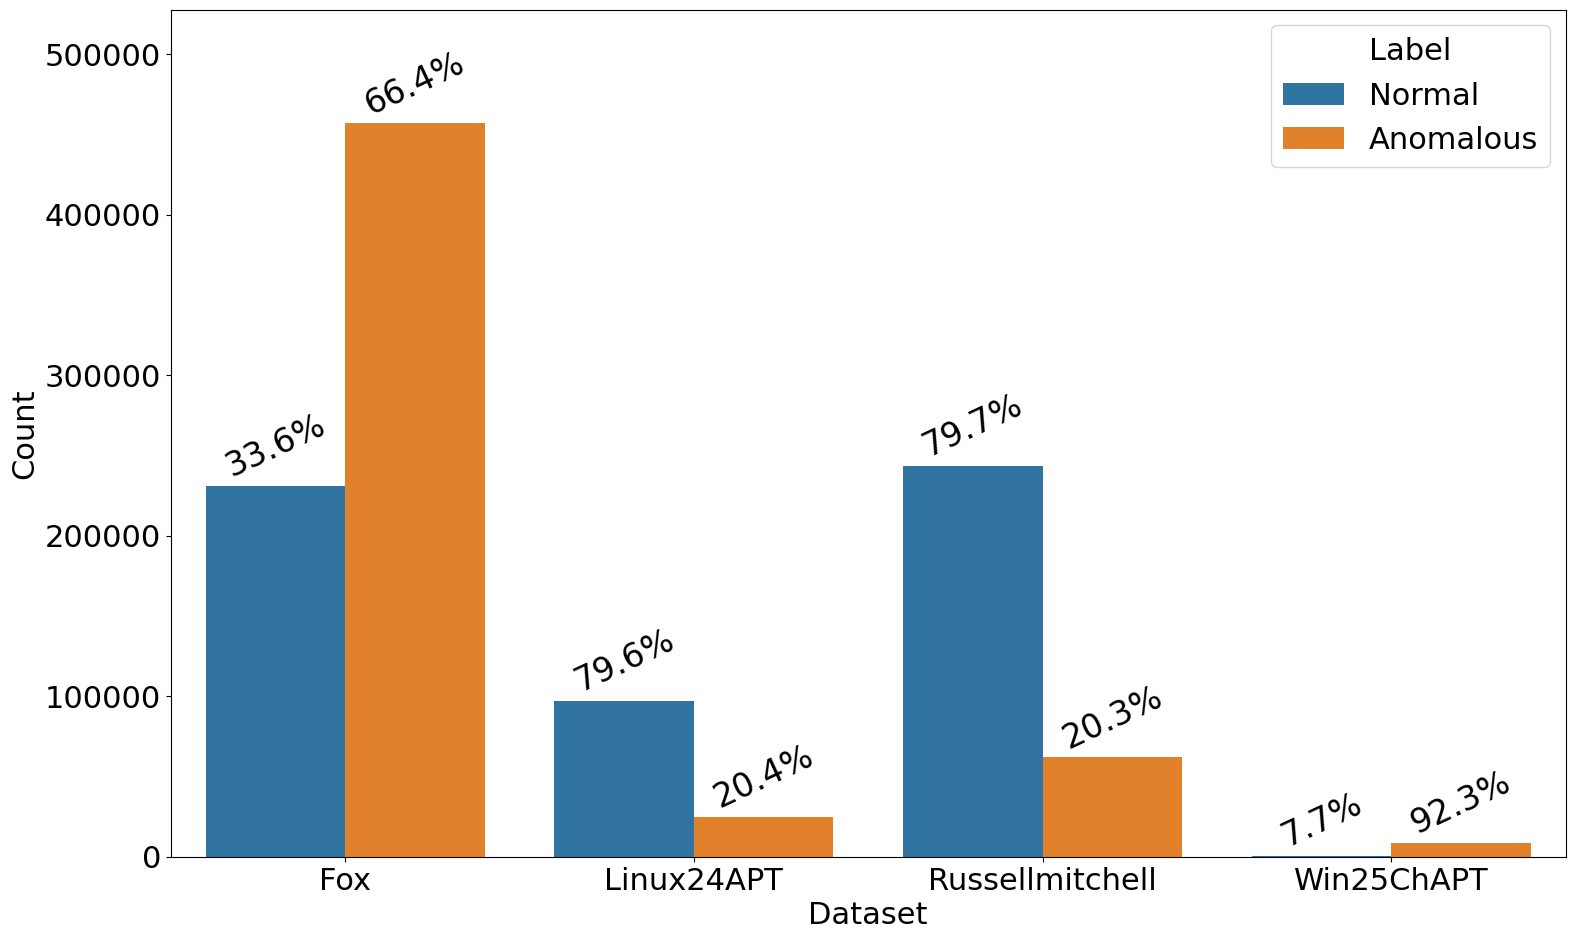

In [48]:
#Convert the dictionary to a DataFrame and reset the index
df = pd.DataFrame(counts).T.reset_index()
df = df.rename(columns={"index": "Dataset"})

# Melt the DataFrame to a long format suitable for Seaborn
# This creates separate rows for 'Normal' and 'Anomalous' counts
df_melted = df.melt(id_vars="Dataset", value_vars=["Normal", "Anomalous"],
                    var_name="Label", value_name="Count")

# --- New section to calculate percentages ---
# Create a dictionary mapping each Dataset to its Total count
total_counts = df.set_index('Dataset')['Total'].to_dict()

# Calculate the percentage for each row in the melted DataFrame
# The percentage is (Count / Total for that Dataset) * 100
df_melted['Percentage'] = df_melted.apply(
    lambda row: (row['Count'] / total_counts[row['Dataset']]) * 100,
    axis=1
)
# --- End of new section ---

# Set the figure size for better readability
plt.figure(figsize=(18, 11))

# Create the bar plot and store the Axes object
ax = sns.barplot(data=df_melted, x="Dataset", y="Count", hue="Label")

# Add the percentage labels on top of each bar
# ax.containers holds the groups of bars (one group for 'Normal', one for 'Anomalous')
for i, container in enumerate(ax.containers):
    # Get the correct percentage values for the current container (hue)
    # The order of hue is determined by the `value_vars` list in `melt`
    hue_label = ["Normal", "Anomalous"][i]
    labels = [f'{p:.1f}%' for p in df_melted[df_melted['Label'] == hue_label]['Percentage']]
    
    # Attach the labels to the bars in the container
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=_FONT_SIZE, padding=2, rotation=25)
    

# Adjust the y-axis limit to give more space for the labels
ax.set_ylim(top=ax.get_ylim()[1] * 1.1)
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=_FS)
ax.get_yaxis().set_tick_params(labelsize=_FS)


# Add titles and labels for clarity
# plt.title("Counts of Normal and Anomalous Labels per Dataset with Percentages")
plt.xlabel("Dataset", fontsize=_FS)
plt.ylabel("Count", fontsize=_FS)
plt.legend(title="Label", fontsize=_FS, title_fontsize=_FS)

# Display the plot
plt.show()

In [27]:
fox_df.columns

Index(['timestamp', 'content', 'labels', 'rules', 'source_file', 'label'], dtype='object')

In [28]:
time_ranges = {}
for name, df in data.items():
    # Ensure the timestamp column is in datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    min_time = df['timestamp'].min()
    max_time = df['timestamp'].max()
    time_ranges[name] = (min_time, max_time)

# Print the ranges (optional)
for name, (start, end) in time_ranges.items():
    print(f"{name}: Start - {start}, End - {end}")

Fox: Start - 2022-01-14 11:15:31.530000, End - 2022-01-20 06:57:39.321000
Linux24APT: Start - 2023-10-01 00:49:18.889000, End - 2024-01-07 10:06:12.096000
Russellmitchell: Start - 2022-01-20 13:11:29.233000, End - 2022-01-25 07:01:52.284000
Win25ChAPT: Start - 2024-10-28 08:51:44.254000, End - 2024-12-22 16:33:38.270000


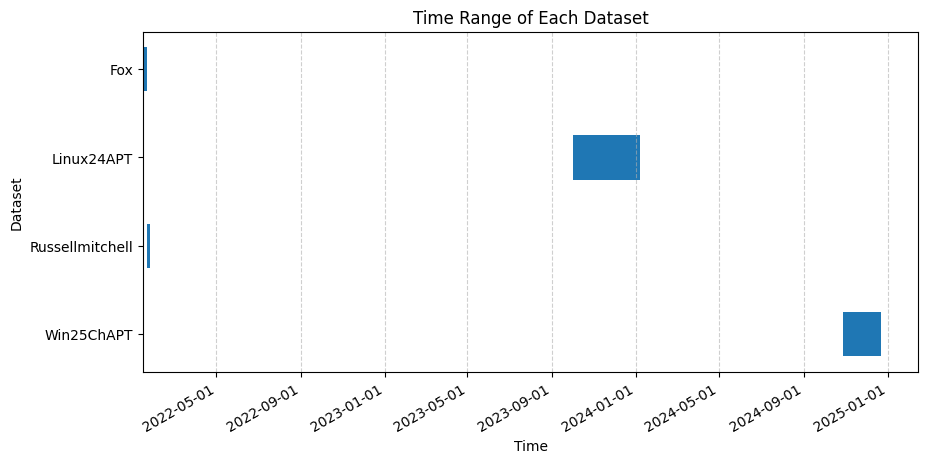

In [29]:
# --- Plot the time ranges ---
import matplotlib.dates as mdates
# Get the dataset names and their start and end times
datasets = list(time_ranges.keys())
start_times = [r[0] for r in time_ranges.values()]
end_times = [r[1] for r in time_ranges.values()]

# Calculate the duration for the bar widths
durations = [end - start for start, end in zip(start_times, end_times)]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the horizontal bars
ax.barh(datasets, durations, left=start_times, height=0.5)

# Format the x-axis to display dates clearly
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate() # Auto-formats the x-axis labels for readability

# Set the labels and title
plt.xlabel('Time')
plt.ylabel('Dataset')
plt.title('Time Range of Each Dataset')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Invert the y-axis to have the first dataset at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [38]:
_FONT_SIZE = 24
_FS = 22

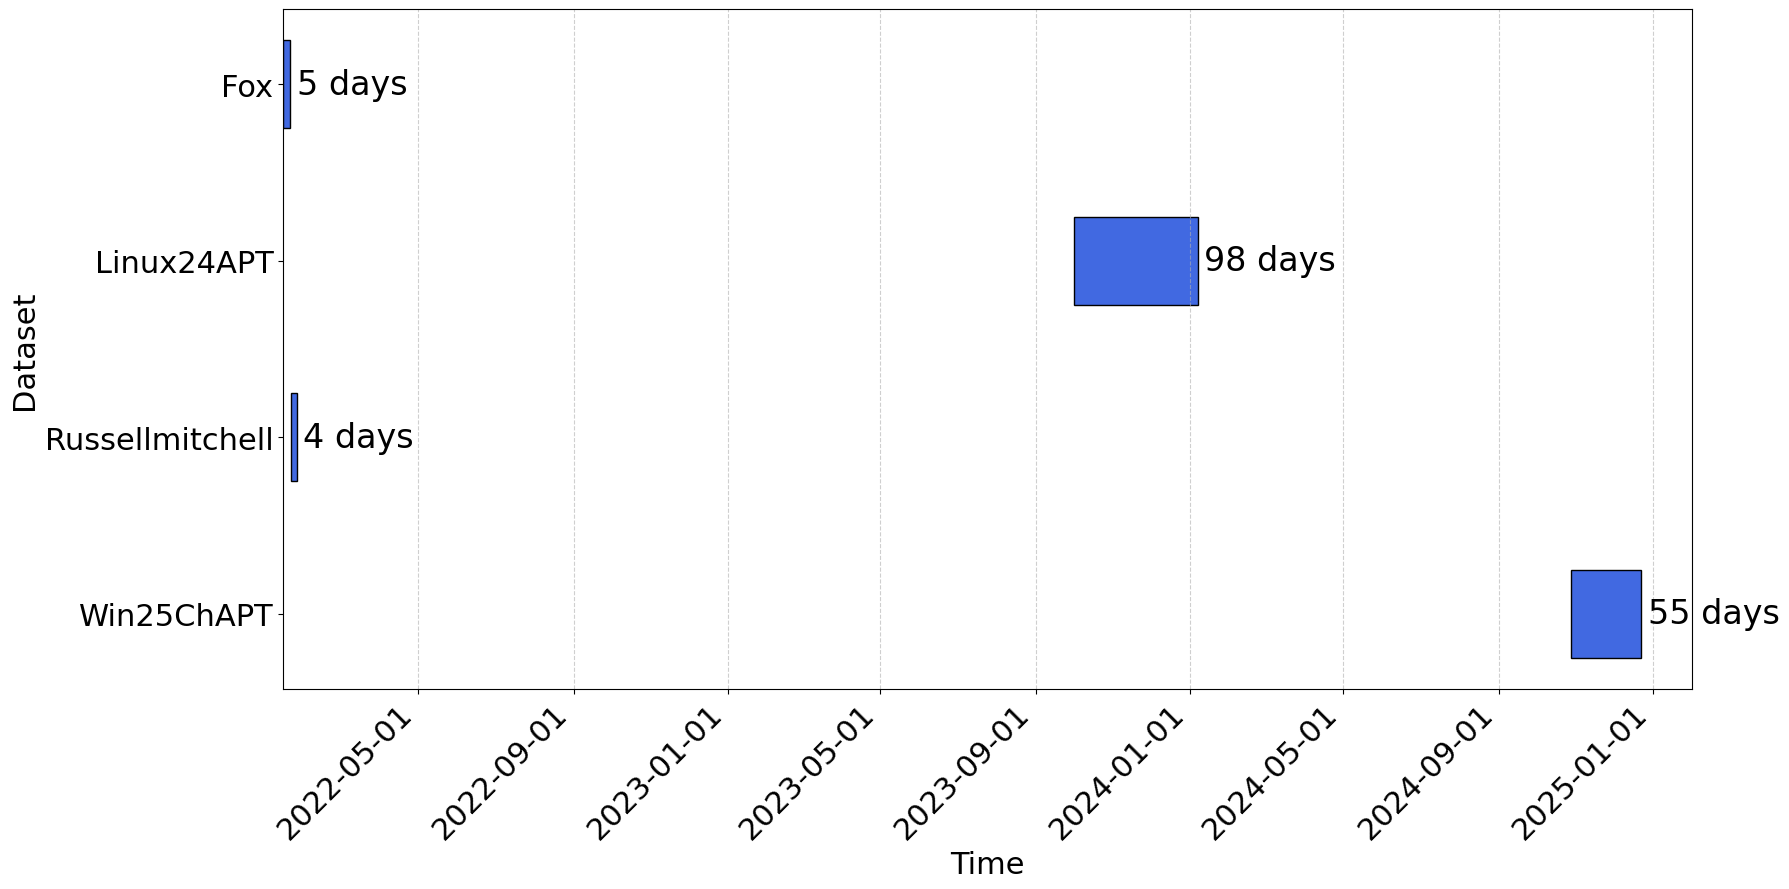

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd # Needed for pd.Timedelta

# --- Plotting Code ---
# This code assumes 'datasets', 'start_times', 'end_times', 
# and 'durations' are already defined.

# Create the plot
fig, ax = plt.subplots(figsize=(18, 9))

# Plot the horizontal bars
ax.barh(datasets, durations, left=start_times, height=0.5, 
        edgecolor="black", color="royalblue")

# Format the x-axis to display dates clearly
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate(rotation=45)

# --- Add day counts to the right of each bar ---
for i, duration in enumerate(durations):
    # Get the total number of days from the timedelta object
    days = duration.days
    
    # Get the ending position (date) of the bar
    bar_end_date = end_times[i]
    
    # Position the text slightly to the right of the bar's end
    # We add a small duration (e.g., 5 days) for padding
    text_position = bar_end_date + pd.Timedelta(days=5)

    ax.text(text_position, i, f'{days} days',
            va='center',        # Vertically align in the middle of the bar
            ha='left',     # Bold text for emphasis
            # Horizontally align text to the LEFT
            color='black',
            fontsize=_FONT_SIZE)        # Set fontsize for the day count text
# --- End of text-adding section ---

# Adjust the x-axis limits to make space for the text
# Find the latest end time and add some days to give it padding
max_date = max(end_times)
ax.set_xlim(left=ax.get_xlim()[0], right=max_date + pd.Timedelta(days=40)) # Increased padding for larger font

# Set the labels and title with fontsize 14
plt.xlabel('Time', fontsize=_FS)
plt.ylabel('Dataset', fontsize=_FS)
# plt.title('Time Range of Each Dataset', fontsize=_FS) # Added fontsize to title
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Set tick label sizes to _FS for both axes
ax.tick_params(axis='both', which='major', labelsize=_FS)

# Invert the y-axis so the first dataset is at the top
plt.gca().invert_yaxis()

# Adjust plot margins to ensure all labels and titles fit
plt.tight_layout()

# Display the final plot
plt.show()

# Generate .log files from the df content column

In [32]:
fox_df.head()

,timestamp,content,labels,rules,source_file,label
0,2022-01-14 11:15:31.530,2022-01-14 11:15:31.530 intranet-server metric...,NaN,NaN,intranet_monitor_df,0
1,2022-01-14 11:15:39.321,2022-01-14 11:15:39.321 intranet-server metric...,NaN,NaN,intranet_monitor_df,0
2,2022-01-14 11:16:24.322,2022-01-14 11:16:24.322 intranet-server metric...,NaN,NaN,intranet_monitor_df,0
3,2022-01-14 11:17:09.321,2022-01-14 11:17:09.321 intranet-server metric...,NaN,NaN,intranet_monitor_df,0
4,2022-01-14 11:17:54.322,2022-01-14 11:17:54.322 intranet-server metric...,NaN,NaN,intranet_monitor_df,0


In [8]:
fox_df.shape

(687989, 6)

In [22]:
def generate_log_files(df, file_path):
    with open(file_path, "w") as f:
        for line in df['content']:
            # if the line doesn't end with a newline, add it
            if not line.endswith('\n'):
                line += '\n'
            f.write(line)
    with open(file_path, "r") as f:
        content = f.read()
    print(f"Generated log file with {len(content.splitlines())} lines. DF: {df.shape[0]}")

In [24]:
log_path = Fox_DIR / "Fox.log"
generate_log_files(fox_df, log_path)


Generated log file with 687989 lines. DF: 687989


In [25]:
log_path = Russellmitchell_DIR / "Russellmitchell.log"
generate_log_files(russ_df, log_path)

Generated log file with 305455 lines. DF: 305455


In [26]:
log_path = Linux24APT / "Linux24APT.log"
generate_log_files(lin_df, log_path)

Generated log file with 121590 lines. DF: 121590


In [27]:
log_path = Win25ChAPT_DIR / "Win25ChAPT.log"
generate_log_files(win_df, log_path)


Generated log file with 9192 lines. DF: 9192


In [14]:
# count nans and spaces in the content column
nan_count = fox_df['content'].isna().sum()
space_count = (fox_df['content'].str.strip() == "").sum()
print(f"Number of NaN values in 'content' column: {nan_count}")
print(f"Number of empty spaces in 'content' column: {space_count}")

Number of NaN values in 'content' column: 0
Number of empty spaces in 'content' column: 0


# After Drain Parsing

In [10]:
fox_str = Fox_DIR / "drain/Fox_structured.csv"
lin_str = Linux24APT / "drain/Linux24APT_structured.csv"
russ_str = Russellmitchell_DIR / "drain/Russellmitchell_structured.csv"
win_str = Win25ChAPT_DIR / "drain/Win25ChAPT_structured.csv"
fox_tmpl = Fox_DIR / "drain/Fox_templates.csv"
lin_tmpl = Linux24APT / "drain/Linux24APT_templates.csv"
russ_tmpl = Russellmitchell_DIR / "drain/Russellmitchell_templates.csv"
win_tmpl = Win25ChAPT_DIR / "drain/Win25ChAPT_templates.csv"


# check if these files exist
files = [fox_str, lin_str, russ_str, win_str, fox_tmpl, lin_tmpl, russ_tmpl, win_tmpl]
for file in files:
    if not file.exists():
        print(f"File {file} does not exist.")
    else:
        continue

In [50]:
# load in dict df
data = {
    "fox": {
        "str": pd.read_csv(fox_str, low_memory=False),
        "tmpl": pd.read_csv(fox_tmpl, low_memory=False)
    },
    "linux": {
        "str": pd.read_csv(lin_str, low_memory=False),
        "tmpl": pd.read_csv(lin_tmpl, low_memory=False)
    },
    "russell": {
        "str": pd.read_csv(russ_str, low_memory=False),
        "tmpl": pd.read_csv(russ_tmpl, low_memory=False)
    },
    "win": {
        "str": pd.read_csv(win_str, low_memory=False),
        "tmpl": pd.read_csv(win_tmpl, low_memory=False)
    }
}

In [12]:
data['fox']['tmpl'].head()

,EventId,EventTemplate,Occurrences
0,54c1f1f3,2022-01-14 <*> intranet-server metricbeat [sys...,8
1,0b660f2e,2022-01-14 <*> intranet-server metricbeat [sys...,41
2,1d5d0444,2022-01-14 11:17:09.321 intranet-server metric...,1
3,05a9d3ca,2022-01-14 <*> intranet-server metricbeat [sys...,2
4,62deefaa,2022-01-14 11:18:39.321 intranet-server metric...,1


In [13]:
data['fox']['tmpl'].shape

(6132, 3)

In [14]:
data['linux']['tmpl'].shape

(315, 3)

In [15]:
data['russell']['tmpl'].shape

(2044, 3)

In [16]:
data['win']['tmpl'].shape

(88, 3)

In [17]:
_FONT_SIZE = 24

/tmp/ipykernel_2199162/548533925.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([name for name in real_names.values()], fontsize=_FS)


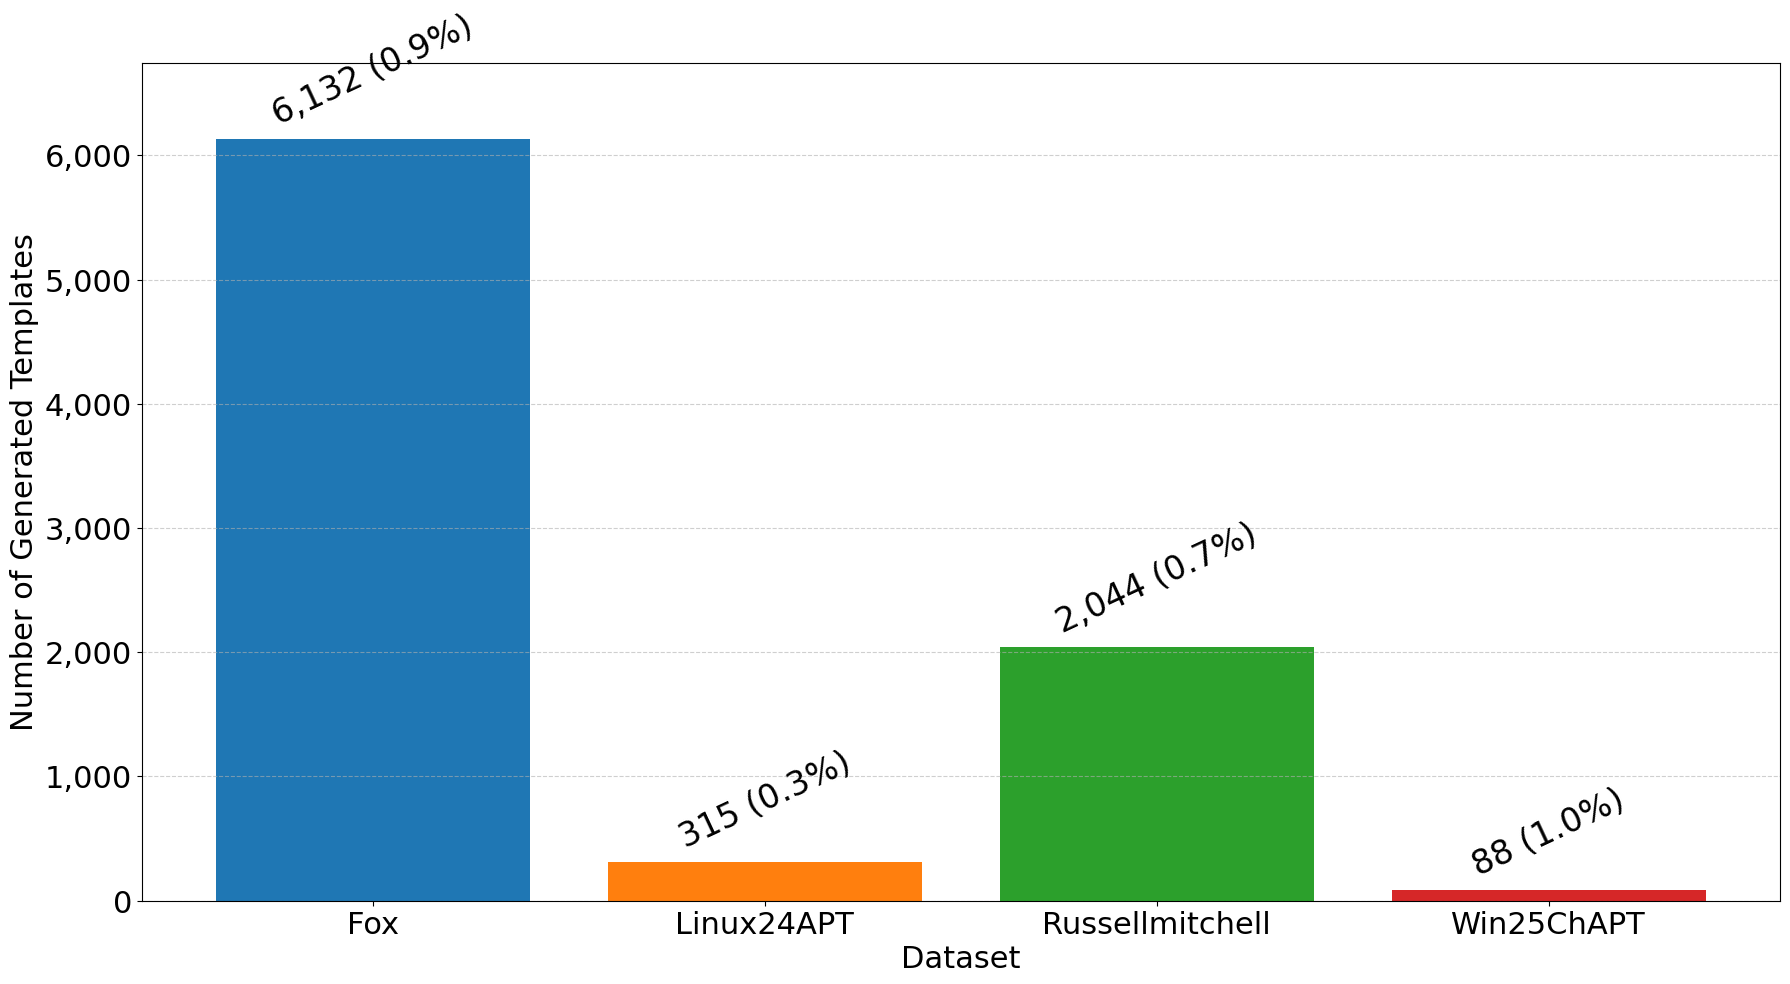

In [51]:
import matplotlib.pyplot as plt
import pandas as pd


# 1. Prepare the data for plotting
dataset_names = list(data.keys())
tmpl_counts = [data[name]['tmpl'].shape[0] for name in dataset_names]
str_counts = [data[name]['str'].shape[0] for name in dataset_names]

# 2. Create the bar chart
fig, ax = plt.subplots(figsize=(18, 10))
bars = ax.bar(dataset_names, tmpl_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# 3. Add annotations on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    
    # The text to display: "tmpl_count / str_count"
    annotation_text = f"{tmpl_counts[i]:,} ({tmpl_counts[i] / str_counts[i]*100:.1f}%)"

    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height + (max(tmpl_counts) * 0.01),  # Position text slightly above the bar
        annotation_text,
        ha='center', 
        va='bottom',
        fontsize=_FONT_SIZE,
        # fontweight='bold',
        rotation=25,  # Rotate text for better readability
    )
real_names = {
    "fox": "Fox",
    "linux": "Linux24APT",
    "russell": "Russellmitchell",
    "win": "Win25ChAPT"
}

# 4. Customize the plot for clarity
ax.set_xlabel('Dataset', fontsize=_FS)
ax.set_ylabel('Number of Generated Templates', fontsize=_FS)
ax.set_xticklabels([name for name in real_names.values()], fontsize=_FS)
# fontsize for y values
ax.get_yaxis().set_tick_params(labelsize=_FS)

ax.get_yaxis(
    
    ).set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ','))
)

ax.set_ylim(0, max(tmpl_counts) * 1.1)

# Add a grid for easier reading
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Ensure the layout is tight
plt.tight_layout()

# 5. Display the plot
plt.show()